In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('flip_data.csv')
data.head()

,name,specs,price
0,"realme C53 (Champion Gold, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB#17...,"₹10,999"
1,"realme C53 (Champion Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB#17...,"₹10,999"
2,"vivo T2x 5G (Marine Blue, 128 GB)",8 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹15,999"
3,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹13,999"
4,"vivo T2x 5G (Glimmer Black, 128 GB)",8 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹15,999"


In [6]:
data['specs'][0].split('#')

['6 GB RAM | 64 GB ROM | Expandable Upto 2 TB',
 '17.12 cm (6.74 inch) HD Display',
 '108MP + 2MP | 8MP Front Camera',
 '5000 mAh Battery',
 'T612 Processor',
 '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories',
 '']

In [7]:
rs, ds, c, b, p = [], [], [], [], []
for i in data['specs']:
  specs = i.split('#')
  rs.append(specs[0])
  ds.append(specs[1])
  c.append(specs[2])
  b.append(specs[3])
  p.append(specs[4])

data['ram and storage'] = rs
data['display'] = ds
data['camera'] = c
data['battery'] = b
data['processor'] = p

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1008 non-null   object
 1   specs            1008 non-null   object
 2   price            1008 non-null   object
 3   ram and storage  1008 non-null   object
 4   display          1008 non-null   object
 5   camera           1008 non-null   object
 6   battery          1008 non-null   object
 7   processor        1008 non-null   object
dtypes: object(8)
memory usage: 63.1+ KB


In [9]:
data.head()

,name,specs,price,ram and storage,display,camera,battery,processor
0,"realme C53 (Champion Gold, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB#17...,"₹10,999",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.12 cm (6.74 inch) HD Display,108MP + 2MP | 8MP Front Camera,5000 mAh Battery,T612 Processor
1,"realme C53 (Champion Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB#17...,"₹10,999",6 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.12 cm (6.74 inch) HD Display,108MP + 2MP | 8MP Front Camera,5000 mAh Battery,T612 Processor
2,"vivo T2x 5G (Marine Blue, 128 GB)",8 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹15,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor
3,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹13,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor
4,"vivo T2x 5G (Glimmer Black, 128 GB)",8 GB RAM | 128 GB ROM#16.71 cm (6.58 inch) Ful...,"₹15,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor


In [10]:
data['name'][0].split('(')[0].split(' ')[0]

'realme'

# Data cleaning

In [11]:
train_data = pd.DataFrame([i.split('(')[0].split(' ')[0].lower() for i in data['name']], columns=['brand'])
train_data['model'] = [' '.join(i.split('(')[0].split(' ')[1:]).lower() for i in data['name']]
train_data

,brand,model
0,realme,c53
1,realme,c53
2,vivo,t2x 5g
3,vivo,t2x 5g
4,vivo,t2x 5g
...,...,...
1003,moto,g 5g
1004,samsung,galaxy a13
1005,mi,10t pro
1006,moto,g 5g


In [12]:
train_data['ram'] = [int(i.split(' ')[0]) for i in data['ram and storage']]
train_data['storage'] = [int(i.split(' ')[4]) for i in data['ram and storage']]

train_data.head()

,brand,model,ram,storage
0,realme,c53,6,64
1,realme,c53,6,64
2,vivo,t2x 5g,8,128
3,vivo,t2x 5g,6,128
4,vivo,t2x 5g,8,128


In [13]:
train_data['display size'] = [float(i.split(' ')[2][1:]) for i in data['display']]
train_data.head()

,brand,model,ram,storage,display size
0,realme,c53,6,64,6.74
1,realme,c53,6,64,6.74
2,vivo,t2x 5g,8,128,6.58
3,vivo,t2x 5g,6,128,6.58
4,vivo,t2x 5g,8,128,6.58


In [14]:
train_data['display type'] = [i.split(')')[1].split('+')[0][1:] for i in data['display']]
train_data.head()

,brand,model,ram,storage,display size,display type
0,realme,c53,6,64,6.74,HD Display
1,realme,c53,6,64,6.74,HD Display
2,vivo,t2x 5g,8,128,6.58,Full HD
3,vivo,t2x 5g,6,128,6.58,Full HD
4,vivo,t2x 5g,8,128,6.58,Full HD


In [15]:
train_data['display type'].value_counts()

display type
Full HD            608
Display            225
HD                 147
Full HD Display     11
HD Display           8
Quad HD              7
Quad HD Display      2
Name: count, dtype: int64

Note : some of the does not reveal the resolution of the displays.

In [16]:
train_data['rear camera'] = [int(re.findall('[0-9]+', i)[0]) for i in data['camera']]

In [17]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera
0,realme,c53,6,64,6.74,HD Display,108
1,realme,c53,6,64,6.74,HD Display,108
2,vivo,t2x 5g,8,128,6.58,Full HD,50
3,vivo,t2x 5g,6,128,6.58,Full HD,50
4,vivo,t2x 5g,8,128,6.58,Full HD,50


In [18]:
train_data['front camera'] = [int(re.findall('[0-9]+', i)[-1]) for i in data['camera']]

In [19]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera
0,realme,c53,6,64,6.74,HD Display,108,8
1,realme,c53,6,64,6.74,HD Display,108,8
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8
4,vivo,t2x 5g,8,128,6.58,Full HD,50,8


In [20]:
train_data['battery'] = [int(re.findall('[0-9]+', i)[0]) for i in data['battery']]
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery
0,realme,c53,6,64,6.74,HD Display,108,8,5000
1,realme,c53,6,64,6.74,HD Display,108,8,5000
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000
4,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000


In [21]:
data['processor'].value_counts()

processor
Qualcomm Snapdragon 680 Processor                      39
1 Year Warranty                                        38
12 Months Warranty                                     33
Mediatek Helio P35 Processor                           26
Mediatek Dimensity 1080 Processor                      22
                                                       ..
1 YEAR FOR DEVICE & SIX MONTH FOR INBOX ACCESSORIES     1
12 MONTHS                                               1
Mediatek Dimensity 8100 Max Processor                   1
Snapdragon® 8 Gen 1 Mobile Processor Processor          1
Mediatek MT6765 Helio P35 (12nm) Processor              1
Name: count, Length: 180, dtype: int64

Just like the resolution some of the brands does not mention the processor information, that is why when we are scraping the data we got warranty info inplace of processor

In [22]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery
0,realme,c53,6,64,6.74,HD Display,108,8,5000
1,realme,c53,6,64,6.74,HD Display,108,8,5000
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000
4,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000


In [23]:
train_data['price'] = [i[1:] for i in data['price']]
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price
0,realme,c53,6,64,6.74,HD Display,108,8,5000,"10,999"
1,realme,c53,6,64,6.74,HD Display,108,8,5000,"10,999"
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000,"15,999"
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000,"13,999"
4,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000,"15,999"


In [24]:
train_data.drop_duplicates(inplace=True)
train_data

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price
0,realme,c53,6,64,6.74,HD Display,108,8,5000,"10,999"
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000,"15,999"
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000,"13,999"
7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,5000,"12,999"
10,realme,11x 5g,6,128,6.72,Full HD,64,8,5000,"14,999"
...,...,...,...,...,...,...,...,...,...,...
997,redmi,note 11t 5g,6,64,6.60,Display,50,50,5000,"17,490"
1000,samsung,a04 e,3,64,6.50,HD,13,5,5000,"10,600"
1004,samsung,galaxy a13,4,64,6.60,Full HD,50,8,5000,"15,900"
1005,mi,10t pro,8,128,6.67,Full HD,108,20,5000,"47,999"


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         600 non-null    object 
 1   model         600 non-null    object 
 2   ram           600 non-null    int64  
 3   storage       600 non-null    int64  
 4   display size  600 non-null    float64
 5   display type  600 non-null    object 
 6   rear camera   600 non-null    int64  
 7   front camera  600 non-null    int64  
 8   battery       600 non-null    int64  
 9   price         600 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 51.6+ KB


# EDA

## univariate

In [26]:
train_data['price'] = [p.replace(',','') for p in train_data['price']]

In [27]:
train_data.drop([466,790],axis=0, inplace=True)

In [28]:
train_data[train_data['price']=='a']

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price


In [29]:
train_data['price'] = train_data['price'].astype('int64')

In [30]:
train_data['brand'].unique()

array(['realme', 'vivo', 'motorola', 'samsung', 'redmi', 'poco', 'google',
       'infinix', 'iqoo', 'oppo', 'xiaomi', 'nothing', 'mi', 'note',
       'moto'], dtype=object)

In [31]:
train_data['brand'] = train_data['brand'].replace({'mi':'xiaomi', 'note':'redmi'})

In [32]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price
0,realme,c53,6,64,6.74,HD Display,108,8,5000,10999
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000,15999
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000,13999
7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,5000,12999
10,realme,11x 5g,6,128,6.72,Full HD,64,8,5000,14999


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         598 non-null    object 
 1   model         598 non-null    object 
 2   ram           598 non-null    int64  
 3   storage       598 non-null    int64  
 4   display size  598 non-null    float64
 5   display type  598 non-null    object 
 6   rear camera   598 non-null    int64  
 7   front camera  598 non-null    int64  
 8   battery       598 non-null    int64  
 9   price         598 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 51.4+ KB


In [34]:
train_data[train_data['ram']==128]

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price
261,redmi,12c,128,6,6.71,Display,50,50,5000,10490
267,redmi,12c,128,6,6.71,Display,50,50,5000,10650
701,redmi,12c,128,6,6.71,Display,50,50,5000,11999


There is an error in Ram and storage for this particaular model

In [35]:
train_data['ram'] = train_data['ram'].replace(128,6)
train_data['storage'] = train_data['storage'].replace(6,128)

In [36]:
import pandas as pd

# Assuming train_data is your DataFrame

# Convert 'price' to numeric, setting errors to 'coerce' to handle non-numeric values
train_data['price'] = pd.to_numeric(train_data['price'], errors='coerce')

# Drop rows with NaN in 'price'
train_data = train_data.dropna(subset=['price'])

# Group by 'brand' and calculate the mean of 'price'
brand_avg_price = train_data.groupby(['brand'])['price'].mean()

# Sort the average prices in descending order
brand_avg_price = brand_avg_price.sort_values(ascending=False)

print(brand_avg_price)


brand
google      47749.000000
nothing     38819.000000
iqoo        27721.650000
xiaomi      26341.433333
samsung     25484.504202
vivo        23463.044944
oppo        22706.622222
moto        20499.000000
motorola    20221.916667
poco        17404.750000
realme      17396.571429
infinix     16127.040000
redmi       14884.322034
Name: price, dtype: float64


/var/folders/50/1jxnmv8527s4kzh8dm8ky6mh0000gn/T/ipykernel_90911/215179023.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=brand_avg_price.index,rotation=45)


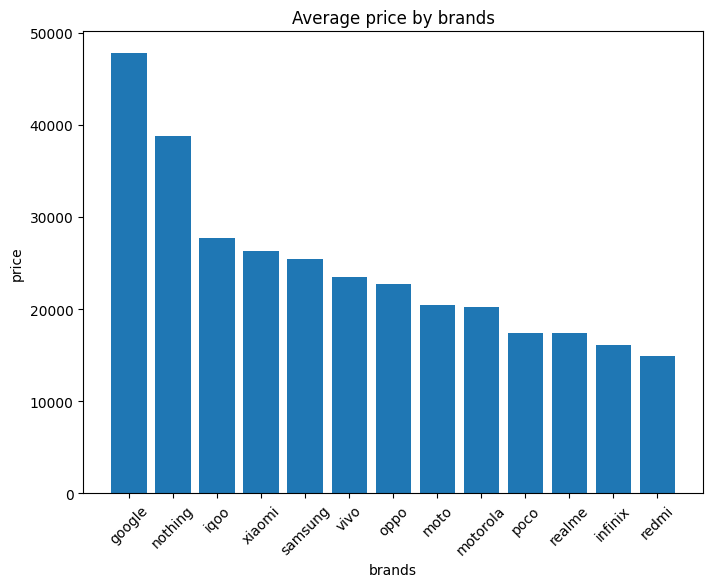

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plt.bar(brand_avg_price.index, brand_avg_price, label=brand_avg_price.index)
ax.set_xticklabels(labels=brand_avg_price.index,rotation=45)
plt.title('Average price by brands')
plt.xlabel('brands')
plt.ylabel('price')
plt.show()

As we can see some of the brands like Google, nothing , xiomi are more expensive than other brand mobiles.

Note : I have cherry picked only few mobile brands for this practice project

In [38]:
ram_avg_price = train_data[['ram', 'price']]

In [39]:
ram_avg_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 1007
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ram     598 non-null    int64
 1   price   598 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


In [40]:
ram_avg_price = ram_avg_price.groupby(['ram']).mean()['price']
ram_avg_price = ram_avg_price.sort_values(ascending=False)
ram_avg_price

ram
12    44669.619048
8     28156.565000
6     16404.652695
4     12625.474359
3     11556.851852
2     10897.500000
Name: price, dtype: float64

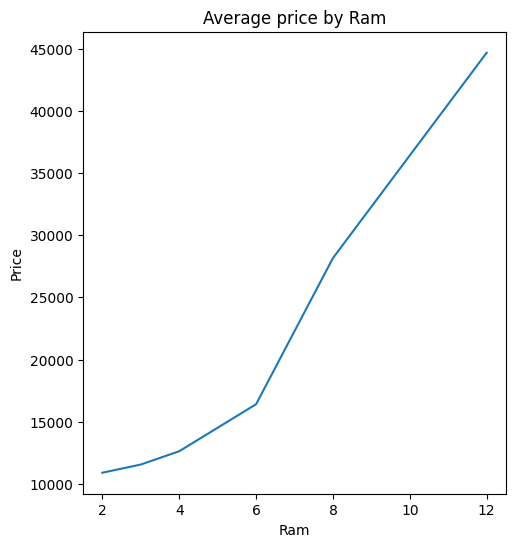

In [41]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(ram_avg_price.index, ram_avg_price)
plt.title('Average price by Ram')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

As we can clearly see the higher the RAM higher the price of the mobile, except for the 128gb which might be an outlier.

In [42]:
storage_avg_price = train_data[['storage', 'price']]

In [43]:
storage_avg_price = storage_avg_price.groupby(['storage']).mean()['price']
storage_avg_price = storage_avg_price.sort_values(ascending=False)
storage_avg_price

storage
512    89999.000000
256    37788.895349
128    20590.955224
64     12637.587097
32     11440.526316
Name: price, dtype: float64

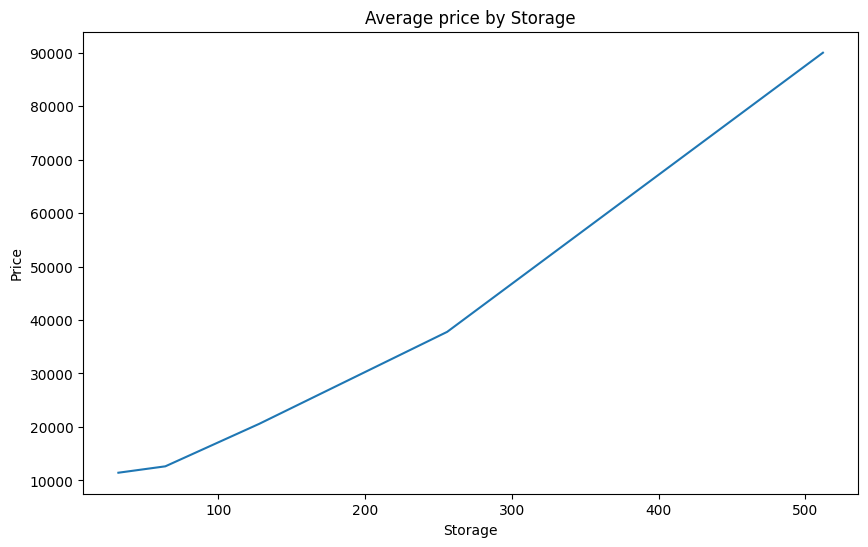

In [44]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
plt.plot(storage_avg_price.index, storage_avg_price)
plt.title('Average price by Storage')
plt.xlabel('Storage')
plt.ylabel('Price')
plt.show()

There is a clear linear realtion between storage and average price of the mobiles.

In [45]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,battery,price
0,realme,c53,6,64,6.74,HD Display,108,8,5000,10999
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,5000,15999
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,5000,13999
7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,5000,12999
10,realme,11x 5g,6,128,6.72,Full HD,64,8,5000,14999


<Axes: ylabel='display size'>

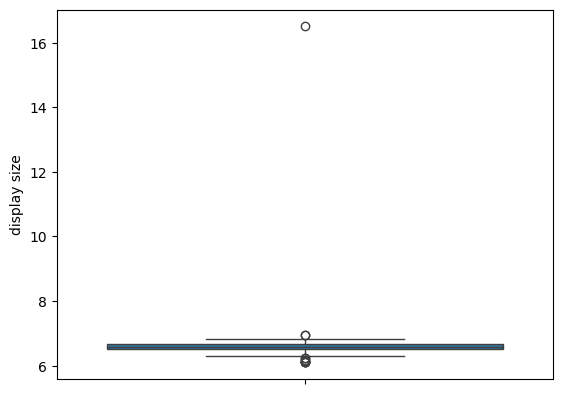

In [46]:
sns.boxplot(train_data['display size'])

We need to remove the outliers in this column

In [49]:
from scipy.stats import iqr

# Calculate the interquartile range (IQR) using the 25th and 75th percentiles
IQR = iqr(train_data['display size'])

# Calculate the lower bound and upper bound
lower_bound = np.percentile(train_data['display size'], 25) - 1.5 * IQR
upper_bound = np.percentile(train_data['display size'], 75) + 1.5 * IQR

dsp_list = []
for i in range(len(train_data['display size'])):
  if list(train_data['display size'])[i] > upper_bound:
    dsp_list.append(upper_bound)
  elif list(train_data['display size'])[i] < lower_bound:
    dsp_list.append(lower_bound)
  else:
    dsp_list.append(list(train_data['display size'])[i])

train_data['display size'] = dsp_list


<Axes: ylabel='display size'>

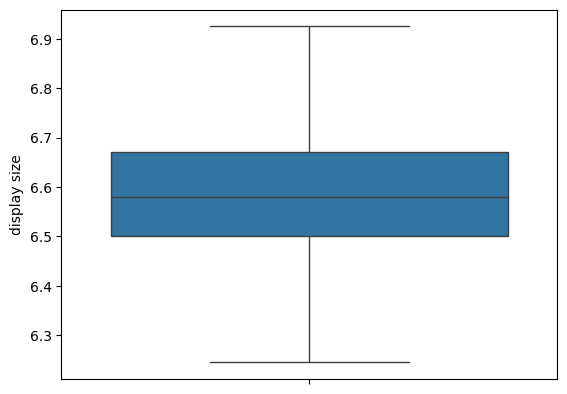

In [50]:
sns.boxplot(train_data['display size'])

<Axes: xlabel='display size', ylabel='price'>

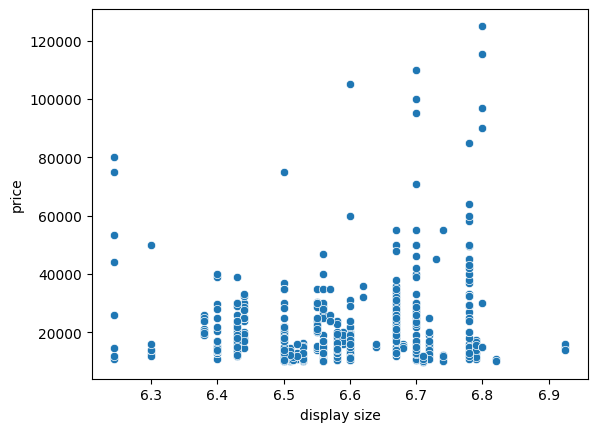

In [51]:
sns.scatterplot(x=train_data['display size'], y=train_data['price'])

There is no definite relation between price and display size column

In [52]:
train_data['display type'].value_counts()

display type
Full HD            322
Display            171
HD                  90
Full HD Display      7
Quad HD              4
HD Display           3
Quad HD Display      1
Name: count, dtype: int64

In [53]:
train_data['display type'] = train_data['display type'].replace({'Full HD Display':'Full HD', 'HD Display':'HD', 'Quad HD Display':'Quad HD'})

In [54]:
train_data['display type'].value_counts()

display type
Full HD    329
Display    171
HD          93
Quad HD      5
Name: count, dtype: int64

In [55]:
display_type_avg_price = train_data[['display type', 'price']]

In [56]:
display_type_avg_price = display_type_avg_price.groupby(['display type']).mean()['price']
display_type_avg_price = display_type_avg_price.sort_values(ascending=False)
display_type_avg_price

display type
Quad HD    93299.200000
Full HD    24030.765957
Display    18009.631579
HD         12276.806452
Name: price, dtype: float64

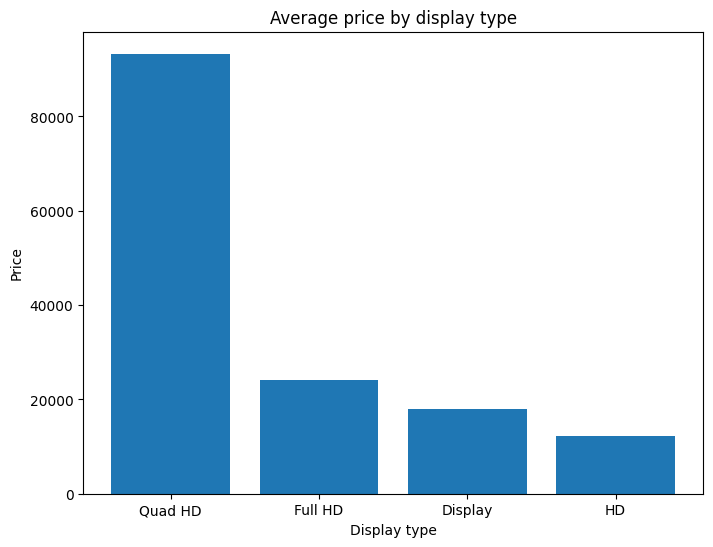

In [57]:
fig3 = plt.figure(figsize=(8,6))

ax3 = fig3.add_subplot(111)
plt.bar(display_type_avg_price.index, display_type_avg_price, label=display_type_avg_price.index)
plt.title('Average price by display type')
plt.xlabel('Display type')
plt.ylabel('Price')
plt.show()


*   Here Display includes mobiles for which we do not have the info about resoluton
*   Resolution of Display has a good relation with price.



In [58]:
train_data['rear camera'].value_counts()

rear camera
50     244
64     127
48      73
13      57
108     49
8       17
12      12
200      8
100      5
5        4
16       2
Name: count, dtype: int64

In [59]:
rear_camera_avg_price = train_data[['rear camera', 'price']]

rear_camera_avg_price = rear_camera_avg_price.groupby(['rear camera']).mean()['price']
rear_camera_avg_price = rear_camera_avg_price.sort_values(ascending=False)
rear_camera_avg_price

rear camera
200    58286.500000
12     51005.000000
100    25550.600000
108    25462.204082
64     22917.968504
50     20655.512295
48     16978.589041
5      14770.250000
16     13994.500000
13     11768.368421
8      11319.058824
Name: price, dtype: float64

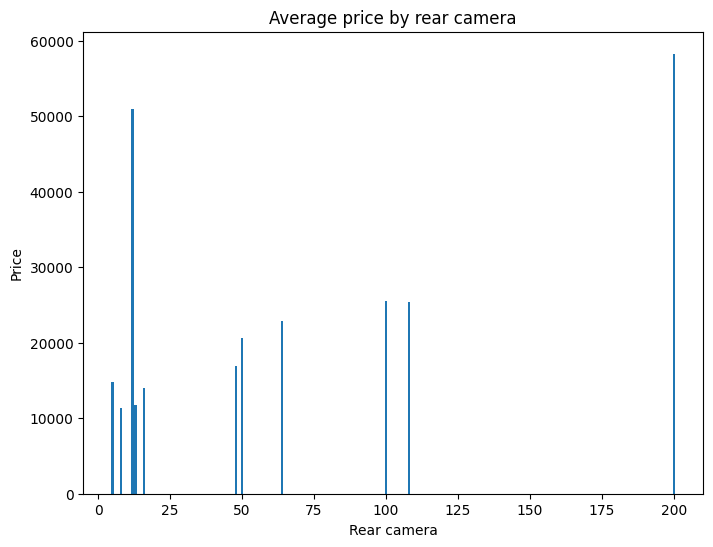

In [60]:
fig4 = plt.figure(figsize=(8,6))

ax4 = fig3.add_subplot(111)
plt.bar(rear_camera_avg_price.index, rear_camera_avg_price, label=rear_camera_avg_price.index)
plt.title('Average price by rear camera')
plt.xlabel('Rear camera')
plt.ylabel('Price')
plt.show()

As we can see there is an increasing trend in the plot.

In [61]:
front_camera_avg_price = train_data[['front camera', 'price']]

front_camera_avg_price = front_camera_avg_price.groupby(['front camera']).mean()['price']
front_camera_avg_price = front_camera_avg_price.sort_values(ascending=False)
front_camera_avg_price

front camera
40     96999.000000
12     91715.666667
10     82999.000000
60     52499.000000
32     36397.345455
20     26661.047619
100    25378.000000
44     24465.000000
108    22683.727273
64     20605.391304
16     19934.624000
50     18910.777778
2      16402.500000
25     15999.000000
13     15979.475410
8      15901.724771
48     15046.642857
5      11604.157895
Name: price, dtype: float64

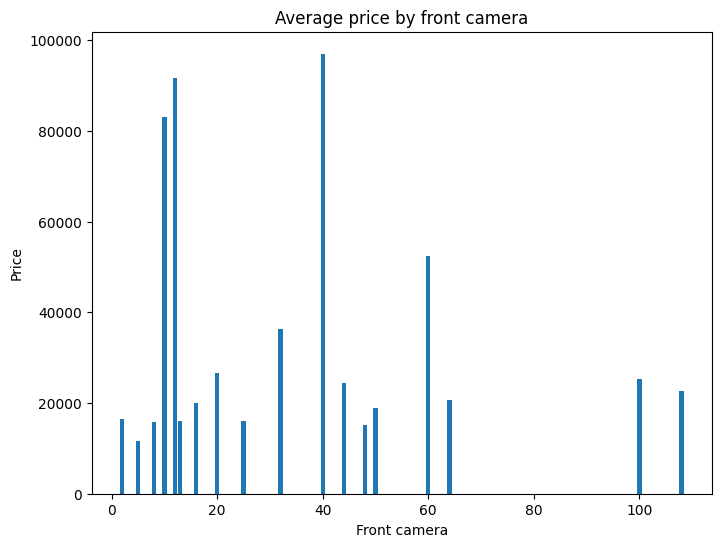

In [62]:
fig5 = plt.figure(figsize=(8,6))

ax5 = fig3.add_subplot(111)
plt.bar(front_camera_avg_price.index, front_camera_avg_price, label=front_camera_avg_price.index)
plt.title('Average price by front camera')
plt.xlabel('Front camera')
plt.ylabel('Price')
plt.show()

In [63]:
train_data.drop(['battery'], axis=1, inplace=True)

In [64]:
train_data.head()

,brand,model,ram,storage,display size,display type,rear camera,front camera,price
0,realme,c53,6,64,6.74,HD,108,8,10999
2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,15999
3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,13999
7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,12999
10,realme,11x 5g,6,128,6.72,Full HD,64,8,14999


No definite relation between front camera and Average price of the mobile.

In [65]:
train_data.to_csv('flip_data_cleaned.csv')

#*Summary*

*   Features like brand, ram, storage, display type has strong and direct relationship with the price of the mobile.
*   Though camera migh not have the direct relation, but when combined with other features they can add value to overall model.
*   We removed battery feature as most of the mobiles come with 5000 or close to 5000 battery capacity



